In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Encoding categorical data

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [6]:
X[:5]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

### Train test split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the test set results

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
print('          y-test           y_pred')
np.concatenate([y_test.reshape(-1, 1), y_pred.reshape(-1, 1)], axis=1)

          y-test           y_pred


array([[103282.38      , 103015.20159796],
       [144259.4       , 132582.27760815],
       [146121.95      , 132447.73845174],
       [ 77798.83      ,  71976.09851258],
       [191050.39      , 178537.48221056],
       [105008.31      , 116161.24230167],
       [ 81229.06      ,  67851.69209676],
       [ 97483.56      ,  98791.73374687],
       [110352.25      , 113969.43533014],
       [166187.94      , 167921.06569551]])

### Visualizing the results

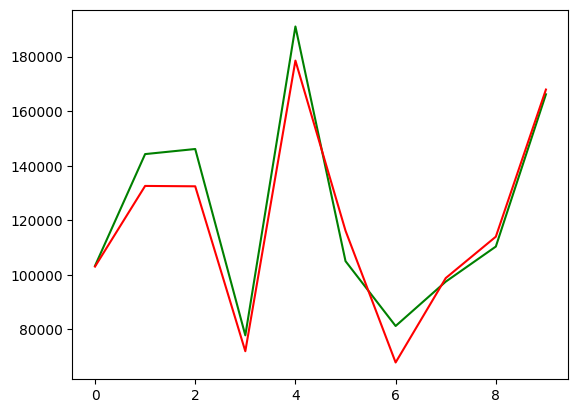

In [13]:
c = [i for i in range(len(y_test))]
plt.plot(c, y_test, 'g')
plt.plot(c, y_pred, 'r')

### Computing metrics

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
arr = (y_test - y_pred) ** 2
sse = np.sum(arr)
sse

835028640.3263049

In [16]:
mse = mean_squared_error(y_test, y_pred)
mse

83502864.03263049

In [17]:
r2s = r2_score(y_test, y_pred)
r2s

0.934706847328201

### Linear regression equation

In [18]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]
42467.5292485298


profit = 86.6 * dummy-state-1 - 873 * dummy-state-2 + 786 * dummy-state-3 + 0.773 * r&d-spend + 0.033 * administration + 0.036 * marketing-spend + 42467.53